In [152]:
import numpy as np

In [153]:
z_init = np.array([[1.0],[1.0]])

In [154]:
A_before = np.array([[0.2,0.8],[-0.8,0.2]])
A_after = np.array([[-0.3,0.7],[-0.7,-0.3]])
B= np.array([[0.7,0.3],[0.8,0.2],[0.2,0.8]])

In [155]:
def transition(A,z):
    return A @ z + np.random.randn(2,1) 

In [156]:
def emmition(B,z):
    return B @ z + np.random.randn(3,1)

In [157]:
T=1000
change_point = 400
_z_seq=[z_init]
_x_seq=[]

for t in range(T):
    _x_seq.append(emmition(B,_z_seq[-1]))
    if t < change_point:
        _z_seq.append(transition(A_before,_z_seq[-1]))
    else:
        _z_seq.append(transition(A_after,_z_seq[-1]))
z_seq = np.array(_z_seq)
x_seq = np.array(_x_seq)

In [158]:
z_seq_reshape =z_seq.reshape(T+1,2).T

In [159]:
print(z_seq_reshape)

[[ 1.          0.54331695  0.41315507 ...  1.59948757 -2.05015093
   0.2915344 ]
 [ 1.         -0.10203893  0.42928127 ... -2.03131614 -0.7634959
   1.14079828]]


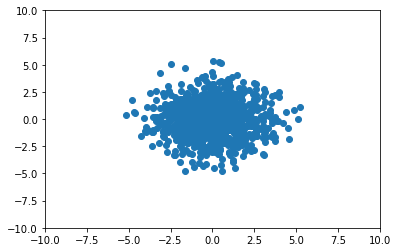

In [160]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(z_seq_reshape[0],z_seq_reshape[1],cmap="jet")
plt.xlim(-10.0,10.0)
plt.ylim(-10.0,10.0)
plt.show()

In [161]:
x_seq_reshape =x_seq.reshape(T,3).T

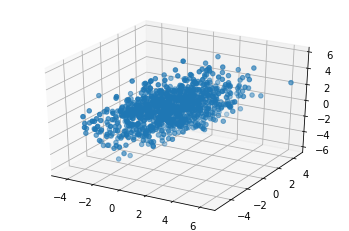

In [162]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x_seq_reshape[0],
    x_seq_reshape[1],
    x_seq_reshape[2])
plt.show()